In [36]:
import numpy as np
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, Dropout, Activation, SimpleRNN, GRU, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [20]:
train_df = pd.read_csv('unsmile_train_v1.0.csv')
train_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [22]:
train_df['target'] = train_df['clean'].map({1:0, 0:1})
train_df

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,target
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0,1
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0,1


In [21]:
test_df = pd.read_csv('unsmile_valid_v1.0.csv')
test_df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0


In [23]:
test_df['target'] = test_df['clean'].map({1:0, 0:1})
test_df

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,target
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0,1
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0,1
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0,1
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0,1
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,저게 시대적언어면 한남충도 시대적언어 아니노 ㅋㅋ,0,1,0,0,0,0,0,0,0,0,0,1
3733,다른것보다 눈이 어떻게 저렇게 생기노.탄식.,0,0,0,0,0,0,0,0,1,0,0,1
3734,막노동을 해도 한국에살고말지 미쳤다고 남미를가냐?차라리 자살을하겠다.,0,0,0,1,0,0,0,0,0,0,0,1
3735,‘사형을 구형하였으나 여성인 점을 감안해 25년 선고’ ???내가 뭐 잘못본건가?개...,1,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X_train = train_df['문장'].values
y_train = train_df['target'].values

X_test = test_df['문장'].values
y_test = test_df['target']

In [26]:
# Tokenizer
tokenizer = Tokenizer()

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[12538, 12539, 12540, 2619, 980], [12541, 12542, 12543, 12544, 1555, 1556, 2620, 144, 6602, 12545, 760, 12546, 12547, 2621, 2622, 12548, 12549, 1], [12550, 12551, 12552, 1557, 6603, 6604, 2176, 219, 12553, 1816, 6605, 2, 12554, 101, 12555], [12556, 12557, 12558, 28, 12559, 96, 67, 12560, 2177, 12561, 1368, 2178], [6606, 3, 373, 12562, 1, 354, 3328, 419, 6607, 484, 7, 4397, 2623, 77, 12563, 12564, 29, 817, 2624, 318, 889, 112, 12, 2179, 2180, 319]]


In [28]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'다': 1, '진짜': 2, '왜': 3, 'ㅋㅋ': 4, '존나': 5, '그냥': 6, '더': 7, 'ㅋㅋㅋ': 8, '좀': 9, '이': 10, '씨발': 11, '그': 12, '시발': 13, '저': 14, 'ㅋㅋㅋㅋ': 15, '근데': 16, '이기야': 17, '안': 18, '난': 19, '새끼들': 20, '하는': 21, '저런': 22, '수': 23, '무슨': 24, '또': 25, '전라도': 26, '아니라': 27, '뭐': 28, '내가': 29, '하고': 30, 'ㅋ': 31, 'ㄹㅇ': 32, '아': 33, '있는': 34, '너무': 35, '이런': 36, 'ㅋㅋㅋㅋㅋ': 37, '여자': 38, '잘': 39, '걍': 40, '보면': 41, '지금': 42, '많이': 43, '역시': 44, '제발': 45, '나도': 46, '없다': 47, '와': 48, '거': 49, '어떻게': 50, '같은': 51, '하면': 52, '저거': 53, '이기': 54, '이제': 55, '아니냐': 56, '그럼': 57, '참': 58, '얼마나': 59, 'ㅋㅋㅋㅋㅋㅋ': 60, '저렇게': 61, '아니': 62, '이게': 63, '뭔': 64, '요즘': 65, '아니고': 66, '이거': 67, '누가': 68, '그리고': 69, '한남': 70, '내': 71, '한다': 72, '정말': 73, 'ㅅㅂ': 74, '없는': 75, '동성애': 76, '이렇게': 77, '한': 78, '그렇게': 79, '절대': 80, '여자가': 81, '돈': 82, '할': 83, '보고': 84, '지': 85, '개슬람': 86, '그게': 87, '함': 88, '솔직히': 89, '다른': 90, '있다': 91, '때문에': 92, '것': 93, '나': 94, '못': 95, '있는데': 96, '조선족': 97, '나라': 98, '이건': 99, '한국': 100, '꼭': 10

In [29]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 54832
단어 집합(vocabulary)에서 희귀 단어의 비율: 81.3905505499562
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 41.34488504837092


In [30]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 67370


최대 길이 : 41
평균 길이 : 8.838454


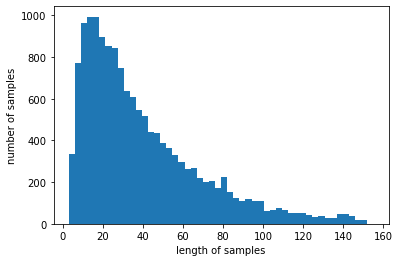

In [31]:
print('최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
max_len = 50
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (15005, 50)


In [33]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5
hidden_units = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPool1D())
model.add(LSTM(hidden_units))
# model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 6s 26ms/step - loss: 0.5587 - acc: 0.7483 - val_loss: 0.5278 - val_acc: 0.7438
Epoch 2/10
188/188 [==============================] - 5s 25ms/step - loss: 0.4625 - acc: 0.7602 - val_loss: 0.4789 - val_acc: 0.7747
Epoch 3/10
188/188 [==============================] - 5s 24ms/step - loss: 0.2236 - acc: 0.9291 - val_loss: 0.5219 - val_acc: 0.7421
Epoch 4/10
188/188 [==============================] - 5s 24ms/step - loss: 0.0798 - acc: 0.9877 - val_loss: 0.6327 - val_acc: 0.7118
Epoch 5/10
188/188 [==============================] - 4s 24ms/step - loss: 0.0329 - acc: 0.9973 - val_loss: 0.7094 - val_acc: 0.7148
Epoch 6/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0187 - acc: 0.9991 - val_loss: 0.7529 - val_acc: 0.7208
Epoch 7/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0131 - acc: 0.9994 - val_loss: 0.7913 - val_acc: 0.7198
Epoch 8/10
188/188 [==============================] - 4s 24ms/step - 

In [34]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

117/117 [==============================] - 0s 2ms/step - loss: 0.9699 - acc: 0.7091

 테스트 정확도: 0.7091


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_test_padded, y_test)
# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) 
AUC = roc_auc_score(y_test, clf.decision_function(X_test_padded))

pred = model.predict(X_test_padded)
accuracy = accuracy_score(y_test,np.round(abs(pred)))
precision = precision_score(y_test,np.round(abs(pred)))
f1 = f1_score(y_test,np.round(abs(pred)))

print("accuracy : ",round(accuracy,4))
print("precision_score : ",round(precision,4))
print("AUC : ", round(AUC,4))
print("f1_score : ",round(f1,4))

accuracy :  0.7091
precision_score :  0.8429
AUC :  0.612
f1_score :  0.795


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
